In [4]:
import math
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [5]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) #write your path here
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform) # write the same path above
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [7]:
import torch.nn as nn 
import torch.nn.functional as F


In [8]:
class Net(nn.Module):
    # for initializing the model
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # first layer as conv with input channels 3 , output channels 6 kernel size 5
        self.pool = nn.MaxPool2d(2, 2) #spatial extent 2 stride 2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)# flatten conv2D to input
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # 10 because we have 10 classes 
    
    #for prediction
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # x initial image pass through conv1 then through relu activation function finally Max pool
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)#flatten
        x = F.relu(self.fc1(x))# pass flattened image to fc 1
        x = F.relu(self.fc2(x))
        x = self.fc3(x)# predict 10 values each for one class
        return x


In [9]:
net = Net()# init the network

import torch.optim as optim

criterion = nn.CrossEntropyLoss()# define a loss function cross entropy loss 
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.95)# stochastic gradient descent with momentum

for epoch in range(6):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)# 
        loss = criterion(outputs, labels)# calculate loss wrt predicted outputs and gt 
        loss.backward()# backpropagate the loss
        optimizer.step()# realize gradient descent update parameters

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,  2000] loss: 2.051
[1,  4000] loss: 1.616
[2,  2000] loss: 1.400
[2,  4000] loss: 1.320
[3,  2000] loss: 1.219
[3,  4000] loss: 1.186
[4,  2000] loss: 1.108
[4,  4000] loss: 1.092
[5,  2000] loss: 1.033
[5,  4000] loss: 1.030
[6,  2000] loss: 0.945
[6,  4000] loss: 0.980


In [100]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH) # save all the parameters to path

dataiter = iter(testloader)
images, labels = dataiter.next()

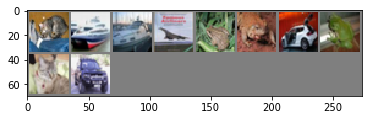

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car plane plane


In [101]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

net = Net()# init the network
net.load_state_dict(torch.load(PATH)) # load the previously saved parameters (weights)

outputs = net(images)# pass the images to the network

_, predicted = torch.max(outputs, 1) # get max values

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)# pass images 
        _, predicted = torch.max(outputs.data, 1) # get max values for each image 
        total += labels.size(0)
        correct += (predicted == labels).sum().item() # sum correctly classified images 

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [103]:
learning_rates = [0.00001,0.0001,0.001,0.01,0.1]
learning_rate_acc = [10,22,50,45,10]

momentums = [0.01,0.1,0.8,0.85,0.9,0.95,0.98,1]
momentum_acc = [14,21,43,46,50,53,52,10]

epochs = [1,2,3,4,5,6]
epoch_acc = [46,53,58,59,61,61]

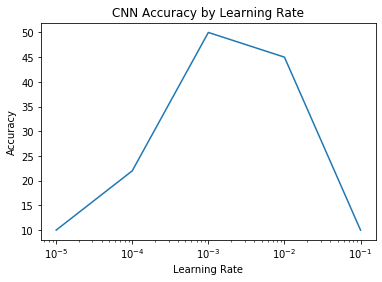

In [116]:
plt.plot(learning_rates, learning_rate_acc, label='accuracy')
plt.xlabel('Learning Rate')
plt.xscale('log')
plt.ylabel('Accuracy')
#plt.ylim([-1, 1])
plt.title('CNN Accuracy by Learning Rate')
plt.savefig('cnn_learning_rates.png', dpi = 300)

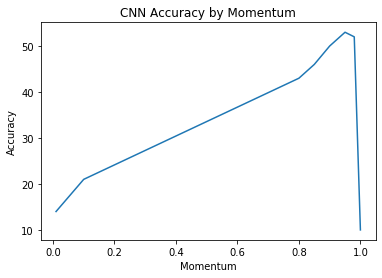

In [117]:
plt.plot(momentums, momentum_acc, label='accuracy')
plt.xlabel('Momentum')
#plt.xscale('log')
plt.ylabel('Accuracy')
#plt.ylim([-1, 1])
plt.title('CNN Accuracy by Momentum')
plt.savefig('cnn_momentum.png', dpi = 300)

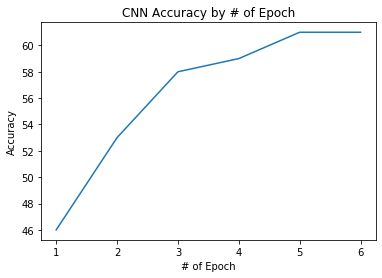

In [118]:
plt.plot(epochs, epoch_acc, label='accuracy')
plt.xlabel('# of Epoch')
#plt.xscale('log')
plt.ylabel('Accuracy')
#plt.ylim([-1, 1])
plt.title('CNN Accuracy by # of Epoch')
plt.savefig('cnn_epoch.png', dpi = 300)